In [81]:
%reload_ext autoreload
%autoreload 2

In [82]:
import numpy as np
from dateutil import parser
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt

import glob
# import plotly.express as px

In [83]:
from manofunkcijos import *

In [ ]:
# pip install pandas

In [84]:
# default importai nuo šiandien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [85]:
a = [1,2,3]
b = [4,5,6]
c = a +b
print(c)

[1, 2, 3, 4, 5, 6]


In [86]:
# tolist() - konvertuoja numpy array į python sąrašą
a = np.arange(0,5)
a_py = a.tolist()
print(a,a_py, type(a), type(a_py), sep = '\n')

[0 1 2 3 4]
[0, 1, 2, 3, 4]
<class 'numpy.ndarray'>
<class 'list'>


TypeError: 'value' must be an instance of str or bytes, not a None

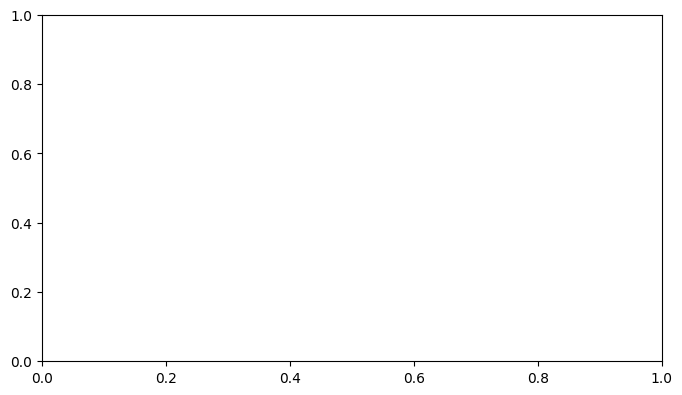

In [89]:
# map()
times = np.random.randint(0,24,1000)

# intervalai : 0-6 - naktis, 7-10 - rytas, 11-12 - priešpietė, 13-14-pietūs, 15-18-pavakarė, 19-22 - vakaras, 23 - 0 - naktis. 
# Parašykite funkciją, kuri iš times sąrašo verčių sugeneruotų tekstų (rytas, vakaras, popietė ... ) sąrašą. 
# Pritaikykite map(). Suskaičiuokite, kiek kartų pasikartojo atitinkami tekstai, atvaizduokite tai su bar arba barh.
def dien_metas(i):
    if i >= 0 and i<=6:
        return 'Naktis'
    elif i >= 7 and i<=10:
        return 'Rytas'
    elif i >= 11 and i<=12:
        return 'Priešpietė'
    elif i >= 13 and i<=14:
        return 'Pietūs'
    elif i >= 15 and i<=16:
        return 'Pavakarė'
    elif i >= 19 and i<=22:
        return 'Vakaras'
    elif i == 23:
        return 'Naktis'

n = list(map(dien_metas,times))
kint = list(set(list(map(dien_metas,times))))
skaic = []
for k in kint:
    skaic.append(n.count(k))
fig, axis = plt.subplots(figsize = [8,4.5])
a = axis.bar(kint, skaic)
axis.bar_label(a)
axis.set_title('Valandos pagal dienos metą')
plt.show()

In [90]:
sar = ['BMW', 'Mitsubishi', 'Seat', 'Skoda', 'Volvo', 'Audi', 'Dacia', 'Skoda', 'BMW', 'Volkswagen', 'BMW', 'Mercedes-Benz', 'Ford', 'BMW', 'BMW', 'Mazda', 'Hyundai', 'Audi', 'Volvo', 'BMW', 'Volkswagen', 'Audi', 'Volkswagen', 'Mercedes-Benz', 'Volkswagen']
# def didz(s):
#     return s[0:3].upper()
# ns = list(map(didz,sar))
ns = list(map(lambda a: a[0:3].upper(),sar))
print(ns)

['BMW', 'MIT', 'SEA', 'SKO', 'VOL', 'AUD', 'DAC', 'SKO', 'BMW', 'VOL', 'BMW', 'MER', 'FOR', 'BMW', 'BMW', 'MAZ', 'HYU', 'AUD', 'VOL', 'BMW', 'VOL', 'AUD', 'VOL', 'MER', 'VOL']


In [ ]:
# :simp - pagrindinių bibliotekų importavimas
# :imp - daugelio bibliotekų importavimas
# :cnt - prisijungimas prie DB
# :sql - SQL nuskaitymas iš DB
# :fig, :sfig - vieno grafiko kodas
# :fig4h, :sfig4h - 4rių ašių kodas
# :sfigh2, :figh2 - dviejų ašių horizontaliai braižymas
# :warnings - išjungia įspėjimus UserWarning
# :streamlit - streamlit projekto pradžia
# :theme - nustato grafikų temą (stilių)
# :bar - vienas bar'as su x ašyje esančiais label'iais
# :bar2 - du bar'ai su x ašyje esančiais label'iais
# :bar3 - stulpelinio (bar) grafiko braižymas, kai yra 3 skirtingi barai, x ašyje norima turėti labelius
#: pdsql - sql užklausa per pandas sql_query

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [11]:
# pip install plotly seaborn

In [91]:
nypd = pd.read_csv('DATA/NYPD.csv', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})[['DATA', 'BORO', 'STATISTICAL_MURDER_FLAG']]
nypd.head(2)

,DATA,BORO,STATISTICAL_MURDER_FLAG
0,2021-03-30 23:45:00,QUEENS,False
1,2021-03-30 16:20:00,BROOKLYN,False


In [92]:
d14 = pd.read_csv('DATA/DUS2014.csv')[['lytis', 'issilavinimas', 'amzius', 'bdu_spalio']]
d14.head(2)

,lytis,issilavinimas,amzius,bdu_spalio
0,M,G4,20-29,6.0
1,F,G2,20-29,6.0


In [93]:
# .apply()

def c(x):
    return x/3.4528

d14['€'] = d14['bdu_spalio'].apply(c)

d14.head(5)

,lytis,issilavinimas,amzius,bdu_spalio,€
0,M,G4,20-29,6.00,1.737720
1,F,G2,20-29,6.00,1.737720
2,F,G4,40-49,6.00,1.737720
3,F,G4,30-39,6.00,1.737720
4,M,G2,40-49,11.33,3.281395


In [94]:
d14['€copy'] = d14['bdu_spalio'].apply(lambda x: x/3.4528)
d14.head(5)

,lytis,issilavinimas,amzius,bdu_spalio,€,€copy
0,M,G4,20-29,6.00,1.737720,1.737720
1,F,G2,20-29,6.00,1.737720,1.737720
2,F,G4,40-49,6.00,1.737720,1.737720
3,F,G4,30-39,6.00,1.737720,1.737720
4,M,G2,40-49,11.33,3.281395,3.281395


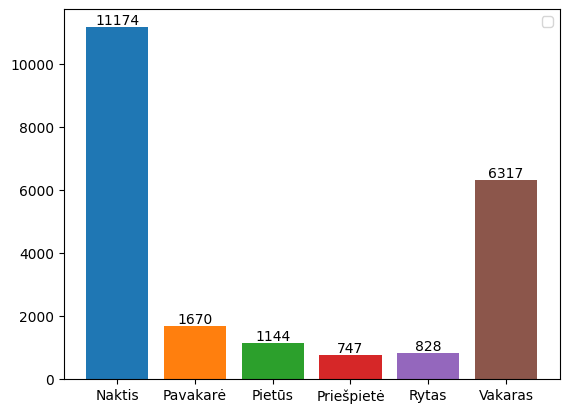

In [95]:
# prisiminti .dt. modulį pandos:
# prie nypd pridėkite naują stulpelį V, kur būtų tik įvykio valanda
nypd['V'] = nypd['DATA'].dt.hour
nypd.head(5)
# tada pritaikykite savo rašytą funkciją su .apply() ir sukurkite naują
# stulpelį su tekstais rytas, vakaras, priešpietė
nypd['Dienos_metas'] = nypd['V'].apply(dien_metas)
nypd.head(5)
# tada vizualizuokite, kuriuo paros metu kiek buvo susišaudymų (bar arba barh)
nypd_metas = nypd.groupby('Dienos_metas')
fig, axis = plt.subplots()
metai = nypd_metas.groups.keys()
for metas in metai:
    b = nypd_metas.get_group(metas)
    h = b['Dienos_metas'].value_counts().sort_index(ascending=True)
    x = axis.bar(h.index, h.values)
    axis.bar_label(x)
axis.legend(loc='best')
plt.show()

In [96]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [97]:
# :pdsql
#sql uzklausa per pandas sql_query
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""select gamintojas as G, rida as R, price as K, variklis, pagaminimo_data as D from autopliuslt"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,G,R,K,variklis,D
0,BMW,253 000 km,19 500,"4999 cm³, 507 AG (373kW)",2005-12
1,Mitsubishi,195 405 km,2 700,"2378 cm³, 160 AG (118kW)",2006
2,Seat,129 800 km,13 490,"1598 cm³, 95 AG (70kW)",2019-11
3,Skoda,183 000 km,14 650,"1798 cm³, 179 AG (132kW)",2015-06
4,Volvo,127 896 km,38 000,"1969 cm³, 235 AG (173kW)",2018-08


In [99]:
# np.nan yra tuscia reiksme not a number

#  pridėkite naujus stulpelius - kaina, rida kaip skaičiai (integer) su apply() metodu, pridėkite naują stulpelį amžius, kaip skaičius
df['Kaina'] = df['K'].apply(lambda x: int(x.replace(' ','')))
def rid(s):
    if s == 'Nenurodyta':
        return np.nan
    else:
        return int(s.replace('km','').replace(' ',''))      
df['Rida'] = df['R'].apply(rid)
def amz(s):
    return 2024-int(s[:4])
df['Amzius'] = df['D'].apply(amz)
df.head()

,G,R,K,variklis,D,Kaina,Rida,Amzius
0,BMW,253 000 km,19 500,"4999 cm³, 507 AG (373kW)",2005-12,19500,253000.0,19
1,Mitsubishi,195 405 km,2 700,"2378 cm³, 160 AG (118kW)",2006,2700,195405.0,18
2,Seat,129 800 km,13 490,"1598 cm³, 95 AG (70kW)",2019-11,13490,129800.0,5
3,Skoda,183 000 km,14 650,"1798 cm³, 179 AG (132kW)",2015-06,14650,183000.0,9
4,Volvo,127 896 km,38 000,"1969 cm³, 235 AG (173kW)",2018-08,38000,127896.0,6
